In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# connecting to mta.db database

engine = create_engine("sqlite:///mta.db")

In [3]:
# viewing table names within mta.db

engine.table_names()

['MTA_2019_20']

In [4]:
# viewing all data from table 'MTA_2017_20'

turnstiles_df= pd.read_sql('SELECT * FROM MTA_2019_20;', engine)

turnstiles_df.head() 

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679


In [5]:
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
# dropping the redundant 'index' column

turnstiles_df = turnstiles_df.drop(columns=['index'])
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679


In [7]:
# stripping any spaces on column names

turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
turnstiles_df.DATE.value_counts().sort_index()

01/01/2020    29428
01/02/2020    30048
01/03/2020    29261
01/04/2020    29439
01/05/2020    29848
              ...  
12/27/2019    29423
12/28/2019    29437
12/29/2019    29384
12/30/2019    29607
12/31/2019    29334
Name: DATE, Length: 91, dtype: int64

In [9]:
# creating datetime column

# with pandas.to_datime
import datetime as dt

turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME,
                                           format="%m/%d/%Y %H:%M:%S")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,00:00:00,REGULAR,7247322,2455491,2019-10-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00


In [93]:
turnstiles_df[(turnstiles_df['DATE_TIME'].dt.month == 11) | (turnstiles_df['DATE_TIME'].dt.month == 11) | (turnstiles_df['DATE_TIME'].dt.month == 12)]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2061624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,20:00:00,REGULAR,5554,420,2019-12-31 20:00:00
2061623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,16:00:00,REGULAR,5554,420,2019-12-31 16:00:00
2061622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,12:00:00,REGULAR,5554,420,2019-12-31 12:00:00
2061621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,08:00:00,REGULAR,5554,420,2019-12-31 08:00:00
2061620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2019,04:00:00,REGULAR,5554,420,2019-12-31 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,16:00:00,REGULAR,7255307,2458611,2019-11-01 16:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,12:00:00,REGULAR,7254971,2458543,2019-11-01 12:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,08:00:00,REGULAR,7254830,2458292,2019-11-01 08:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/01/2019,04:00:00,REGULAR,7254790,2458189,2019-11-01 04:00:00


In [96]:
turnstiles_df.head(6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2678437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,20:00:00,REGULAR,5554,420,2020-01-24 20:00:00
2678436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,16:00:00,REGULAR,5554,420,2020-01-24 16:00:00
2678435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,12:00:00,REGULAR,5554,420,2020-01-24 12:00:00
2678434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,08:00:00,REGULAR,5554,420,2020-01-24 08:00:00
2678433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,04:00:00,REGULAR,5554,420,2020-01-24 04:00:00
2678432,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,00:00:00,REGULAR,5554,420,2020-01-24 00:00:00


In [11]:
turnstiles_df.DESC.value_counts()

REGULAR       2666663
RECOVR AUD      11775
Name: DESC, dtype: int64

In [12]:
# removing duplicate entries
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],
                         inplace=True, ascending=False)

turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                              inplace=True)

In [13]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
2678437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,20:00:00,REGULAR,5554,420,2020-01-24 20:00:00
2678436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,16:00:00,REGULAR,5554,420,2020-01-24 16:00:00
2678435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,12:00:00,REGULAR,5554,420,2020-01-24 12:00:00
2678434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,08:00:00,REGULAR,5554,420,2020-01-24 08:00:00
2678433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/24/2020,04:00:00,REGULAR,5554,420,2020-01-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,16:00:00,REGULAR,7247755,2455679,2019-10-26 16:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,12:00:00,REGULAR,7247463,2455623,2019-10-26 12:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,08:00:00,REGULAR,7247351,2455532,2019-10-26 08:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/26/2019,04:00:00,REGULAR,7247336,2455499,2019-10-26 04:00:00


In [14]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("DATE_TIME", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1655965,PTH22,R540,00-02-06,PATH NEW WTC,2020-01-24 23:59:42,1
1571542,PTH10,R547,00-00-00,9TH STREET,2020-01-24 23:56:51,1
1616247,PTH18,R549,01-00-04,NEWARK BM BW,2020-01-24 23:54:19,1
1526767,PTH03,R552,00-01-06,JOURNAL SQUARE,2020-01-24 23:53:41,1
1653891,PTH22,R540,00-02-02,PATH NEW WTC,2020-01-24 23:52:29,1


In [ ]:
turnstiles_df

In [15]:
# creating a new dataframe of daily turnstile entries & exits
turnstiles_daily = (turnstiles_df
                    .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"], as_index=False)
                   ['ENTRIES','EXITS'].first())

<ipython-input-15-d012e763bb33>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily = (turnstiles_df


In [16]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,01/01/2020,7328499,2483910
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396


In [17]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily
                                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES","EXITS"]
                                                                    .apply(lambda grp: grp.shift(1)))

<ipython-input-17-5f88879a6d23>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily


In [18]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,01/01/2020,7328499,2483910,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375,01/01/2020,7328499.0,2483910.0
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839,01/02/2020,7329882.0,2484375.0
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166,01/03/2020,7331169.0,2484839.0
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396,01/04/2020,7331951.0,2485166.0


In [20]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375,01/01/2020,7328499.0,2483910.0
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839,01/02/2020,7329882.0,2484375.0
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166,01/03/2020,7331169.0,2484839.0
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396,01/04/2020,7331951.0,2485166.0
5,A002,R051,02-00-00,59 ST,01/06/2020,7333879,2485925,01/05/2020,7332543.0,2485396.0
...,...,...,...,...,...,...,...,...,...,...
445481,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,5554,420,12/26/2019,5554.0,420.0
445482,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/28/2019,5554,420,12/27/2019,5554.0,420.0
445483,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/29/2019,5554,420,12/28/2019,5554.0,420.0
445484,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/30/2019,5554,420,12/29/2019,5554.0,420.0


In [21]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
24,A002,R051,02-00-00,59 ST,10/26/2019,7248159,2455733,01/24/2020,7356045.0,2493693.0
115,A002,R051,02-00-01,59 ST,10/26/2019,6445451,1447723,01/24/2020,6535988.0,1469548.0
206,A002,R051,02-03-00,59 ST,10/26/2019,1304975,4919013,01/24/2020,1347844.0,5085940.0
297,A002,R051,02-03-01,59 ST,10/26/2019,1299717,1981872,01/24/2020,1399433.0,2145394.0
388,A002,R051,02-03-02,59 ST,10/26/2019,6386655,8542165,01/24/2020,6481814.0,8662331.0


In [23]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            1
             02-00-01  59 ST            1
             02-03-00  59 ST            1
             02-03-01  59 ST            1
             02-03-02  59 ST            1
                                       ..
TRAM2  R469  00-00-00  RIT-ROOSEVELT    1
             00-00-01  RIT-ROOSEVELT    1
             00-03-00  RIT-ROOSEVELT    1
             00-03-01  RIT-ROOSEVELT    1
             00-05-00  RIT-ROOSEVELT    1
Length: 4649, dtype: int64

In [24]:
# function for getting daily entries column
def daily_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
        
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(daily_entries, axis=1, max_counter=1000000)

85130869 476777.0
459077 85175465.0
3823824 108991.0
263 3846402.0
2137518 63600.0
864 2152170.0
1771576 170535719.0
170526823 1802952.0
1730 1455549.0
1343785 30234.0
2175340 129829.0
1041 2210879.0
6817400 110492.0
973 6844908.0
49 8294808.0
8176868 13873.0
507 2379734.0
2313292 18973.0
7 2344491.0
2312899 724.0
10356049 395553.0
5421 10392294.0
5967356 215960.0
2157 6026406.0
10 11957933.0
11823893 6032.0
673 4895014.0
4827775 6682.0
4785471 11470775.0
11337848 4798034.0
19739139 181607.0
2204 19783118.0
270532819 536177.0
505408 270535090.0
1062 2302008.0
2152137 19861.0
395233 2064683.0
1855070 413482.0
117440512 458752.0
458752 117440512.0
2010 22737699.0
22401841 42368.0
455 3854804.0
3740504 7366.0
3 69161601.0
69010916 14.0
1087 9501355.0
9425521 3211.0
1077 8438239.0
8363053 49.0
1840785 173405.0
3728 1842366.0
655360 3529766.0
3518390 589.0
4408208 1009744.0
2069 4443445.0
6620238 84206.0
178 6625781.0
864164 5001368.0
4982302 877264.0
3200558 16324.0
582 3243165.0
67120006 

In [25]:
# function for getting daily exits column
def daily_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
        
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(daily_exits, axis=1, max_counter=1000000)

1245640 99656.0
82664 1292529.0
9687072 334913.0
618 9756892.0
1273335 788540225.0
788531266 1306274.0
1112809 65765.0
726 1130345.0
3977622 72180.0
832 3994495.0
193 6728678.0
6618869 13907.0
120 1117134.0
1093196 6822.0
29 7223168.0
7131799 2696.0
2481398 116773.0
761 2493061.0
110 1019563.0
793 2273628.0
2099303 9144.0
122 2149320.0
2124202 2174.0
132255 5311986.0
5234241 138592.0
11130932 102392.0
1016 11154770.0
880808202 44277.0
26957 880809459.0
3776 6339905.0
5919164 61132.0
67404 1772207.0
1603053 84138.0
431 6230854.0
6120435 14368.0
91 2021925.0
1937577 4537.0
362 17180829.0
17154120 1.0
1443 7494344.0
7399769 4155.0
925 4816664.0
4746369 36.0
5135152 38714.0
823 5183836.0
8342520 55252.0
492 8345610.0
4442793 16381.0
575 4484776.0
4395226 32190.0
582 4444194.0
150933508 5389.0
14442467 150898963.0
18615998 31168.0
1156 18785683.0
862 8005510.0
7887067 30638.0
1621 13737367.0
13474438 9850.0
2048961127 12628970.0
12514572 2048983533.0
1570 2048959791.0
2048805249 20429.0
319

In [27]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/02/2020,7329882,2484375,01/01/2020,7328499.0,2483910.0,1383.0,465.0
2,A002,R051,02-00-00,59 ST,01/03/2020,7331169,2484839,01/02/2020,7329882.0,2484375.0,1287.0,464.0
3,A002,R051,02-00-00,59 ST,01/04/2020,7331951,2485166,01/03/2020,7331169.0,2484839.0,782.0,327.0
4,A002,R051,02-00-00,59 ST,01/05/2020,7332543,2485396,01/04/2020,7331951.0,2485166.0,592.0,230.0
5,A002,R051,02-00-00,59 ST,01/06/2020,7333879,2485925,01/05/2020,7332543.0,2485396.0,1336.0,529.0


In [131]:
stations_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
stations_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,01/02/2020,15443.0,17949.0
1,1 AV,01/03/2020,16168.0,18683.0
2,1 AV,01/04/2020,6930.0,7771.0
3,1 AV,01/05/2020,5586.0,6176.0
4,1 AV,01/06/2020,16560.0,18893.0


In [132]:
stations_daily['YEAR'] = pd.to_datetime(stations_daily['DATE']).dt.year
stations_daily['MONTH'] = pd.to_datetime(stations_daily['DATE']).dt.month
stations_daily['DAY_OF_MONTH'] = pd.to_datetime(stations_daily['DATE']).dt.day
stations_daily['WEEK_OF_YEAR'] = pd.to_datetime(stations_daily['DATE']).dt.week

<ipython-input-132-e60588097398>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  stations_daily['WEEK_OF_YEAR'] = pd.to_datetime(stations_daily['DATE']).dt.week


In [133]:
# dropping rows with month = 10, because we only want Dec - Jan

stations_daily = stations_daily[stations_daily['MONTH'] != 10]
stations_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR
0,1 AV,01/02/2020,15443.0,17949.0,2020,1,2,1
1,1 AV,01/03/2020,16168.0,18683.0,2020,1,3,1
2,1 AV,01/04/2020,6930.0,7771.0,2020,1,4,1
3,1 AV,01/05/2020,5586.0,6176.0,2020,1,5,1
4,1 AV,01/06/2020,16560.0,18893.0,2020,1,6,2
...,...,...,...,...,...,...,...,...
33961,ZEREGA AV,12/27/2019,2155.0,1998.0,2019,12,27,52
33962,ZEREGA AV,12/28/2019,1223.0,1389.0,2019,12,28,52
33963,ZEREGA AV,12/29/2019,1003.0,1106.0,2019,12,29,52
33964,ZEREGA AV,12/30/2019,1865.0,1941.0,2019,12,30,1


In [136]:
stations_daily.groupby('YEAR')
stations_daily.sort_values(by=['STATION','YEAR', 'MONTH', 'DAY_OF_MONTH', 'WEEK_OF_YEAR'], ascending=[True, True, True, True, True],inplace=True)

In [137]:
stations_daily

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR
29,1 AV,11/01/2019,20858.0,23426.0,2019,11,1,44
30,1 AV,11/02/2019,8834.0,9856.0,2019,11,2,44
31,1 AV,11/03/2019,7791.0,8766.0,2019,11,3,44
32,1 AV,11/04/2019,18467.0,20262.0,2019,11,4,45
33,1 AV,11/05/2019,16754.0,18477.0,2019,11,5,45
...,...,...,...,...,...,...,...,...
33894,ZEREGA AV,01/20/2020,1429.0,1384.0,2020,1,20,4
33895,ZEREGA AV,01/21/2020,2647.0,2496.0,2020,1,21,4
33896,ZEREGA AV,01/22/2020,2755.0,2576.0,2020,1,22,4
33897,ZEREGA AV,01/23/2020,2730.0,2392.0,2020,1,23,4


In [139]:
%matplotlib inline
import matplotlib.pyplot as plt

In [140]:
import numpy as np

In [88]:
station_totals = (stations_daily.groupby('STATION').sum()
                 .sort_values("DAILY_ENTRIES", ascending=False).reset_index())

station_totals.head()

,STATION,DAILY_ENTRIES,DAILY_EXITS
0,34 ST-PENN STA,25041339.0,24841908.0
1,GRD CNTRL-42 ST,21892729.0,22026820.0
2,23 ST,20205670.0,16538068.0
3,34 ST-HERALD SQ,19286236.0,18909903.0
4,42 ST-PORT AUTH,16006463.0,13223593.0


Text(0.5, 0, '')

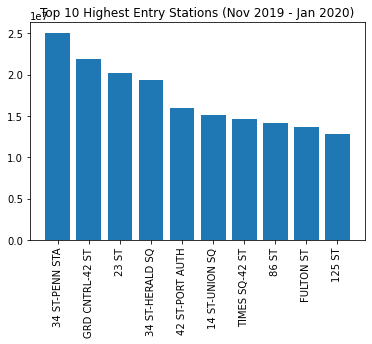

In [73]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.title('Top 10 Highest Entry Stations (Nov 2019 - Jan 2020)')
plt.xlabel('')

In [154]:
# time series for a station

station_daily_34_ST_PENN_STA = stations_daily[(stations_daily['STATION'] == '34 ST-PENN STA') &
                                             (stations_daily['MONTH'] == 11)]
station_daily_34_ST_PENN_STA

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,YEAR,MONTH,DAY_OF_MONTH,WEEK_OF_YEAR
5518,34 ST-PENN STA,11/01/2019,177421.0,173107.0,2019,11,1,44
5519,34 ST-PENN STA,11/02/2019,98469.0,96323.0,2019,11,2,44
5520,34 ST-PENN STA,11/03/2019,100593.0,96302.0,2019,11,3,44
5521,34 ST-PENN STA,11/04/2019,178240.0,163605.0,2019,11,4,45
5522,34 ST-PENN STA,11/05/2019,174899.0,160018.0,2019,11,5,45
5523,34 ST-PENN STA,11/06/2019,182361.0,165472.0,2019,11,6,45
5524,34 ST-PENN STA,11/07/2019,181372.0,168105.0,2019,11,7,45
5525,34 ST-PENN STA,11/08/2019,173452.0,170546.0,2019,11,8,45
5526,34 ST-PENN STA,11/09/2019,92000.0,85541.0,2019,11,9,45
5527,34 ST-PENN STA,11/10/2019,85911.0,76534.0,2019,11,10,45


Text(0.5, 0, 'Date')

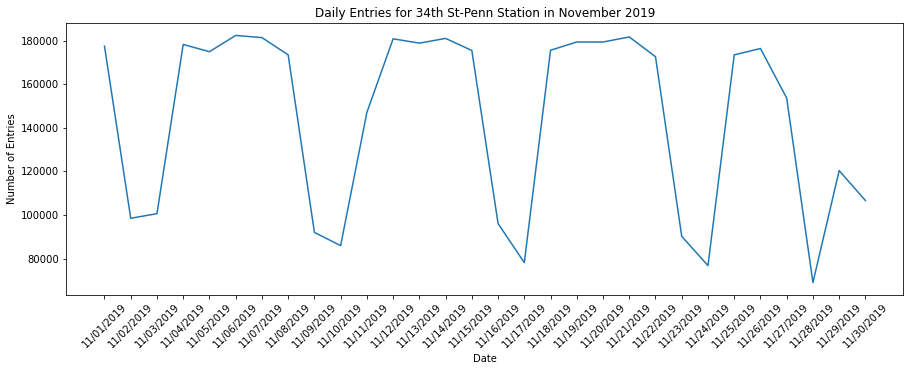

In [152]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_34_ST_PENN_STA_NOV['DATE'], station_daily_34_ST_PENN_STA['DAILY_ENTRIES'])
plt.xticks(rotation=45)
plt.title('Daily Entries for 34th St-Penn Station in November 2019')
plt.ylabel('Number of Entries')
plt.xlabel('Date')